In [51]:
# python 3.6 and tensorflow (both 1.x and 2.0)
def allow_gpu_memory_growth(log_device_placement=True):
    """
    Allow dynamic memory growth (by default, tensorflow allocates all gpu memory).
    This sometimes fixes the 
    <<Error : Failed to get convolution algorithm. 
    This is probably because cuDNN failed to initialize, 
    so try looking to see if a warning log message was printed above>>. 
    May hurt performance slightly (see https://www.tensorflow.org/guide/gpu).

    Usage: Run before any other code.

    :param log_device_placement: set True to log device placement (on which device the operation ran)
    :return:None
    """
    from tensorflow.compat.v1.keras.backend import set_session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
    config.log_device_placement = log_device_placement
    sess = tf.compat.v1.Session(config=config)
    set_session(sess)

In [52]:
# Import and check which version of Tensorflow we are using
import tensorflow as tf

print('We are using Tensorflow version', tf.__version__, 'for this exercise')

We are using Tensorflow version 2.0.0 for this exercise


In [53]:
import zipfile

local_zip_from = 'C:/Users/andre/Desktop/xray_data/ZhangLabData.zip'
local_zip_to = zipfile.ZipFile(local_zip_from, 'r')
local_zip_to.extractall('C:/Users/andre/Desktop/xray_data')
local_zip_to.close()

In [54]:
import os

base_dir = 'C:/Users/andre/Desktop/xray_data/CellData/chest_xray/'
train_dir = os.path.join(base_dir, 'train/')
test_dir = os.path.join(base_dir, 'test/')

print(train_dir)
print(test_dir)

C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/
C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/


In [55]:
# Directory with our training normal pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')

# Directory with our training pneumonia pictures
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with our testing normal pictures
test_normal_dir = os.path.join(test_dir, 'NORMAL')

# Directory with our testing pneumonia pictures
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

print(train_normal_dir)
print(train_pneumonia_dir)
print(test_normal_dir)
print(test_pneumonia_dir)

C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/NORMAL
C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/PNEUMONIA
C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/NORMAL
C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/PNEUMONIA


In [56]:
print(train_normal_dir)

C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/NORMAL


In [57]:
list = os.listdir('C:\\Users\\andre\\Desktop\\xray_data\\CellData\\chest_xray\\train\\NORMAL') # dir is your directory path
number_files = len(list)
print (number_files)

1349


In [58]:
total_train_normal = len(os.listdir(train_normal_dir))
total_train_pneumonia = len(os.listdir(train_pneumonia_dir))
total_test_normal = len(os.listdir(test_normal_dir))
total_test_pneumonia = len(os.listdir(test_pneumonia_dir))
print('There are ', total_train_normal, 'normal chest xrays in the entire training set')
print('There are ', total_train_pneumonia, 'pneumonia chest xrays in the entire training set')
print('There are ', total_test_normal, 'normal chest xrays in the entire test set')
print('There are ', total_test_pneumonia, 'pneumonia chest xrays in the entire test set')

There are  1349 normal chest xrays in the entire training set
There are  3884 pneumonia chest xrays in the entire training set
There are  235 normal chest xrays in the entire test set
There are  390 pneumonia chest xrays in the entire test set


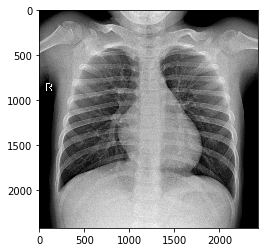

In [59]:
# Loading and analyzing an image
import cv2
import matplotlib.pyplot as plt

images = []

cv_image = cv2.imread('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/NORMAL/NORMAL-28501-0001.jpeg')
#images.append(cv_image)
plt.imshow(cv_image)

Let's look at the distribution of pixel values in the image. Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.  

An easy way to check this is to plot a histogram.

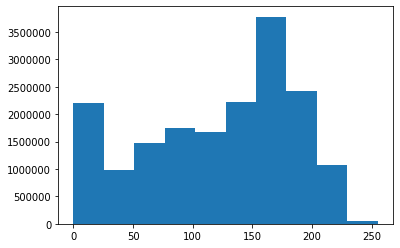

In [60]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(cv_image.ravel())
plt.show()

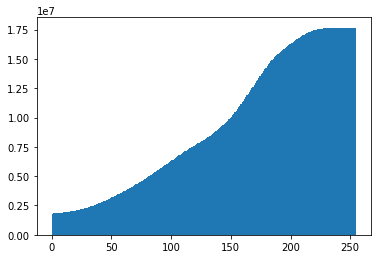

In [61]:
# Using a CDF...

plt.hist(cv_image.ravel(), bins=255, cumulative=True)
plt.show()

In [62]:
from skimage import exposure
import numpy as np

# Contrast stretching
p2 = np.percentile(cv_image, 2)
p98 = np.percentile(cv_image, 98)
image_ct = exposure.rescale_intensity(cv_image, in_range=(p2, p98))

C:\Users\andre\Anaconda3\envs\TensorFlow 2\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


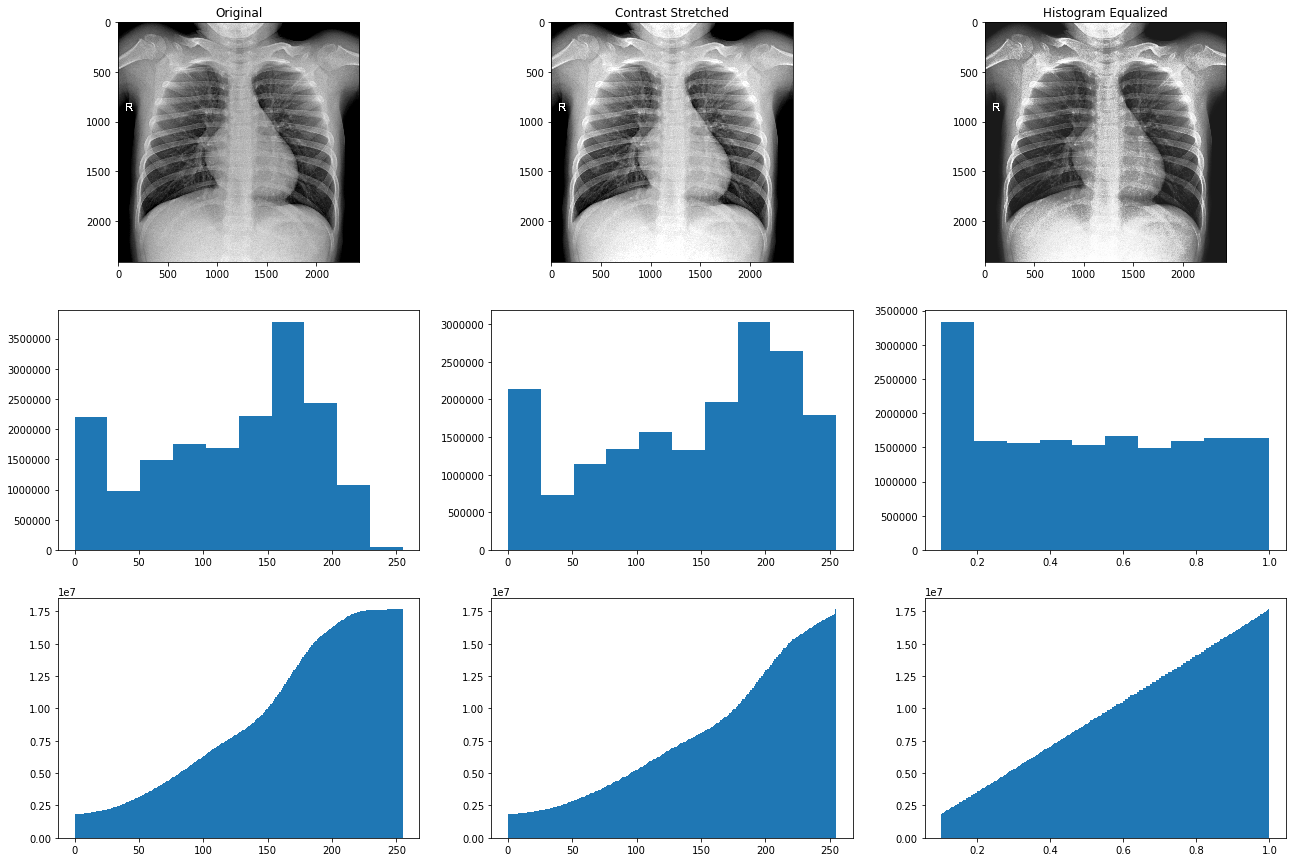

In [63]:
# Histogram Equalization
image_eq = exposure.equalize_hist(cv_image)

# Show the images
fig = plt.figure(figsize=(22, 15))

# Subplot for original image
a=fig.add_subplot(3,3,1)
imgplot = plt.imshow(cv_image)
a.set_title('Original')

# Subplot for contrast stretched image
a=fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized image
a=fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Histogram Equalized')

# Subplots for histograms
a=fig.add_subplot(3,3,4)
imgplot = plt.hist(cv_image.ravel())

a=fig.add_subplot(3,3,5)
imgplot = plt.hist(image_ct.ravel())

a=fig.add_subplot(3,3,6)
imgplot = plt.hist(image_eq.ravel())

# Subplots for CDFs

a=fig.add_subplot(3,3,7)
imgplot = plt.hist(cv_image.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,8)
imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

plt.show()

#### Preparing the Training data

In [64]:
from PIL import Image
import cv2
import pandas as pd
import seaborn as sns
import numpy as np

Images_N = []
Labels_N = []

Normal = os.listdir('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/NORMAL/')

# Preparing and labelling Normal xrays
for n in Normal:
    try:
        image = cv2.imread('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/NORMAL/' + n)
        images = Image.fromarray(image, 'RGB')
        images_rs = images.resize((200,250))
        Images_N.append(np.array(images_rs))
        Labels_N.append(0)
    except AttributeError:
        print('')

In [65]:
Images_N = np.array(Images_N)
Labels_N = np.array(Labels_N)

In [66]:
print(Images_N.shape)
print(Labels_N.shape)

(1349, 250, 200, 3)
(1349,)


In [67]:
Images_N_EH = exposure.equalize_hist(Images_N)

In [68]:
print(Images_N_EH.shape)
print(Labels_N.shape)

(1349, 250, 200, 3)
(1349,)


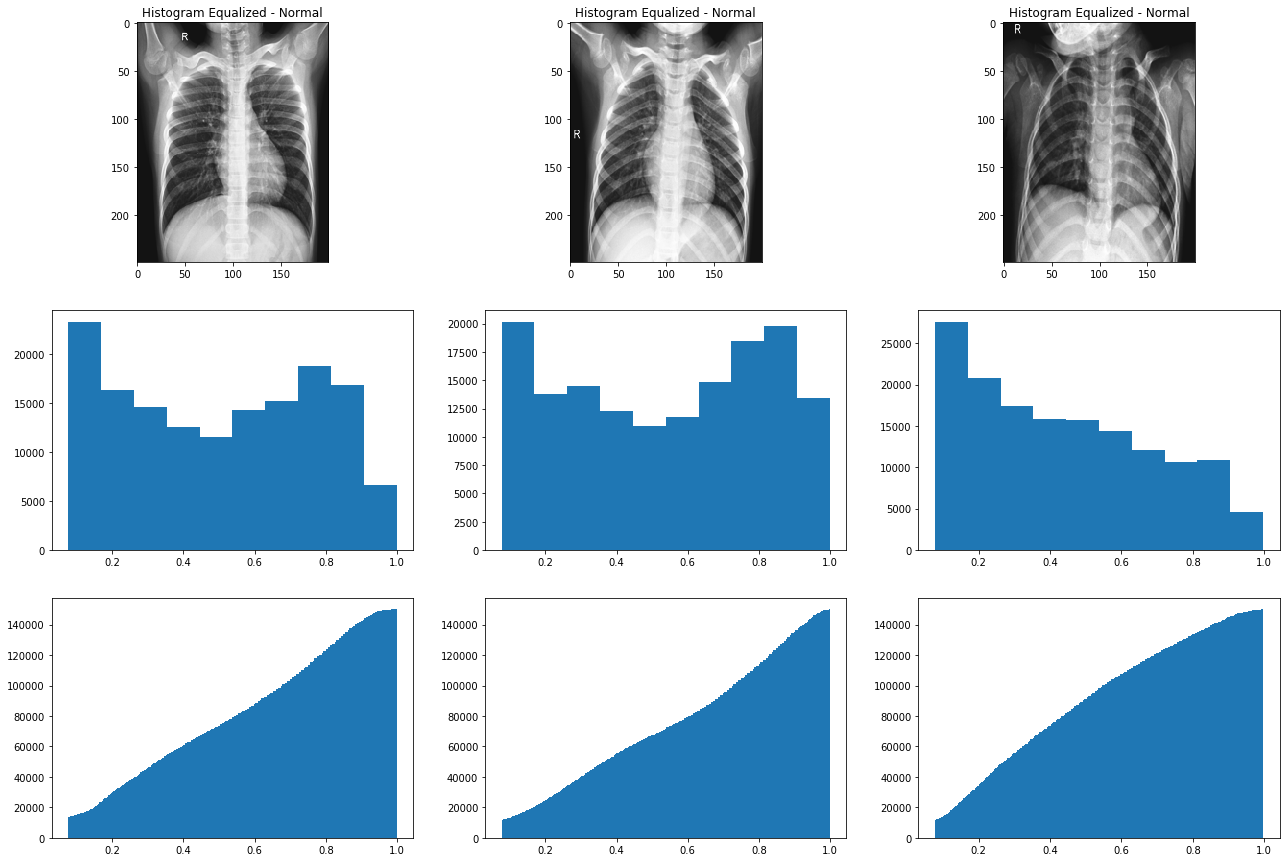

In [69]:
# Show the images
fig_n = plt.figure(figsize=(22,15))

# Subplot for a few equalized xrays
n = fig_n.add_subplot(3,3,1)
imgplot = plt.imshow(Images_N_EH[0])
n.set_title('Histogram Equalized - Normal')

n = fig_n.add_subplot(3,3,2)
imgplot = plt.imshow(Images_N_EH[1])
n.set_title('Histogram Equalized - Normal')

n = fig_n.add_subplot(3,3,3)
imgplot = plt.imshow(Images_N_EH[3])
n.set_title('Histogram Equalized - Normal')

# Subplots for equalized histograms of a few xrays
n = fig_n.add_subplot(3,3,4)
imgplot = plt.hist(Images_N_EH[0].ravel())

n = fig_n.add_subplot(3,3,5)
imgplot = plt.hist(Images_N_EH[1].ravel())

n = fig_n.add_subplot(3,3,6)
imgplot = plt.hist(Images_N_EH[3].ravel())

# Subplots for CDFs for a few xrays
n = fig_n.add_subplot(3,3,7)
imgplot = plt.hist(Images_N_EH[0].ravel(), bins=255, cumulative=True)

n = fig_n.add_subplot(3,3,8)
imgplot = plt.hist(Images_N_EH[1].ravel(), bins=255, cumulative=True)

n = fig_n.add_subplot(3,3,9)
imgplot = plt.hist(Images_N_EH[3].ravel(), bins=255, cumulative=True)

plt.show()


In [70]:
Images_P = []
Labels_P = []

Pneumonia = os.listdir('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/PNEUMONIA/')

# Preparing and labelling Pnuemonia xrays
for p in Pneumonia:
    try:
        image = cv2.imread('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/train/PNEUMONIA/' + p)
        images = Image.fromarray(image, 'RGB')
        images_rs = images.resize((200,250))
        Images_P.append(np.array(images_rs))
        Labels_P.append(1)
    except AttributeError:
        print('')

In [71]:
Images_P = np.array(Images_P)
Labels_P = np.array(Labels_P)

In [72]:
print(Images_P.shape)
print(Labels_P.shape)

(3883, 250, 200, 3)
(3883,)


In [73]:
Images_P_EH = exposure.equalize_hist(Images_P)

In [74]:
print(Images_P_EH.shape)

(3883, 250, 200, 3)


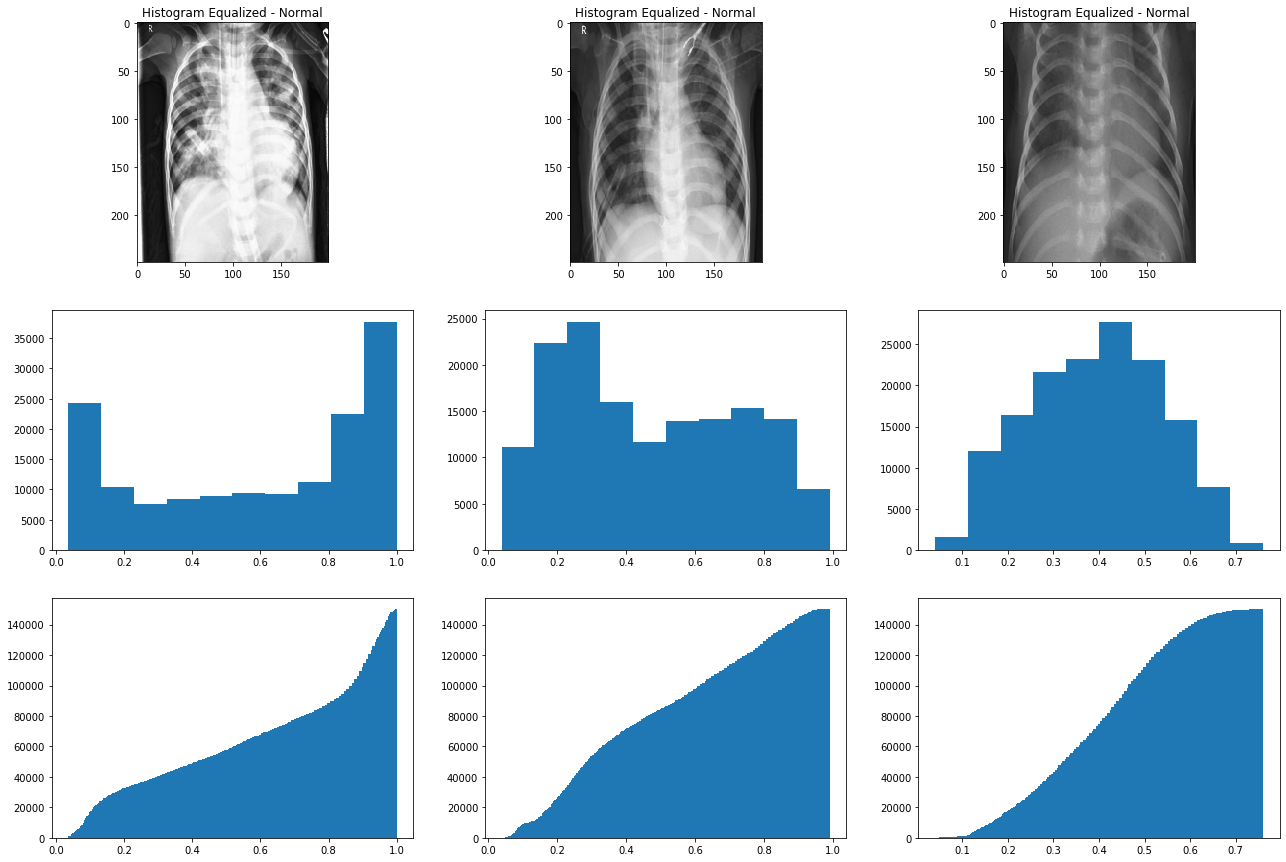

In [75]:
# Show the images
fig_p = plt.figure(figsize=(22,15))

# Subplot for a few equalized xrays
p = fig_p.add_subplot(3,3,1)
imgplot = plt.imshow(Images_P_EH[0])
p.set_title('Histogram Equalized - Normal')

p = fig_p.add_subplot(3,3,2)
imgplot = plt.imshow(Images_P_EH[1])
p.set_title('Histogram Equalized - Normal')

p = fig_p.add_subplot(3,3,3)
imgplot = plt.imshow(Images_P_EH[3])
p.set_title('Histogram Equalized - Normal')

# Subplots for equalized histograms of a few xrays
p = fig_p.add_subplot(3,3,4)
imgplot = plt.hist(Images_P_EH[0].ravel())

p = fig_p.add_subplot(3,3,5)
imgplot = plt.hist(Images_P_EH[1].ravel())

p = fig_p.add_subplot(3,3,6)
imgplot = plt.hist(Images_P_EH[3].ravel())

# Subplots for CDFs for a few xrays
p = fig_p.add_subplot(3,3,7)
imgplot = plt.hist(Images_P_EH[0].ravel(), bins=255, cumulative=True)

p = fig_p.add_subplot(3,3,8)
imgplot = plt.hist(Images_P_EH[1].ravel(), bins=255, cumulative=True)

p = fig_p.add_subplot(3,3,9)
imgplot = plt.hist(Images_P_EH[3].ravel(), bins=255, cumulative=True)

plt.show()

In [76]:
# Combining the Normal and Pneumonia images in the training set

total_Train = [*Images_N_EH, *Images_P_EH]
total_Labels = [*Labels_N, *Labels_P]

In [77]:
print(len(total_Train))
total_Train = np.array(total_Train)
total_Labels = np.array(total_Labels)

5232


In [78]:
print(total_Train.shape)
print(total_Labels.shape)

(5232, 250, 200, 3)
(5232,)


#### Preparing the Test data

In [79]:
Images_N_Tst = []
Labels_N_Tst = []

Normal_Tst = os.listdir('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/NORMAL/')

# Preparing and labelling Normal xrays in Test set
for n in Normal_Tst:
    try:
        image_tst = cv2.imread('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/NORMAL/' + n)
        images_tst = Image.fromarray(image_tst, 'RGB')
        images_rs_tst = images_tst.resize((200,250))
        Images_N_Tst.append(np.array(images_rs_tst))
        Labels_N_Tst.append(0)
    except AttributeError:
        print('')

In [80]:
Images_N_Tst = np.array(Images_N_Tst)
Labels_N_Tst = np.array(Labels_N_Tst)

In [81]:
print(Images_N_Tst.shape)
print(Labels_N_Tst.shape)

(234, 250, 200, 3)
(234,)


In [82]:
Images_N_EH_Tst = exposure.equalize_hist(Images_N_Tst)

In [83]:
print(Images_N_EH_Tst.shape)

(234, 250, 200, 3)


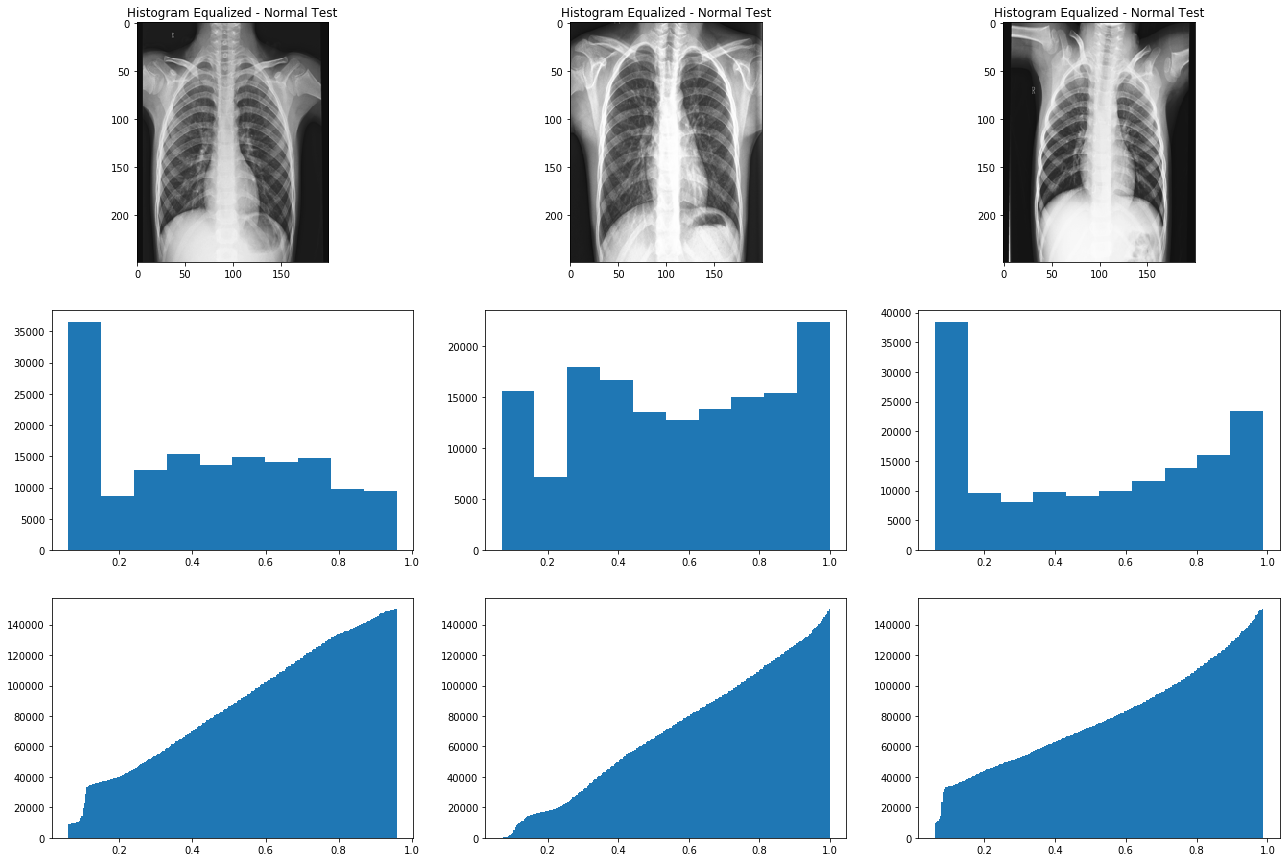

In [84]:
# Show the images
fig_n_tst = plt.figure(figsize=(22,15))

# Subplot for a few equalized xrays
n_tst = fig_n_tst.add_subplot(3,3,1)
imgplot = plt.imshow(Images_N_EH_Tst[0])
n_tst.set_title('Histogram Equalized - Normal Test')

n_tst = fig_n_tst.add_subplot(3,3,2)
imgplot = plt.imshow(Images_N_EH_Tst[1])
n_tst.set_title('Histogram Equalized - Normal Test')

n_tst = fig_n_tst.add_subplot(3,3,3)
imgplot = plt.imshow(Images_N_EH_Tst[3])
n_tst.set_title('Histogram Equalized - Normal Test')

# Subplots for equalized histograms of a few xrays
n_tst = fig_n_tst.add_subplot(3,3,4)
imgplot = plt.hist(Images_N_EH_Tst[0].ravel())

n_tst = fig_n_tst.add_subplot(3,3,5)
imgplot = plt.hist(Images_N_EH_Tst[1].ravel())

n_tst = fig_n_tst.add_subplot(3,3,6)
imgplot = plt.hist(Images_N_EH_Tst[3].ravel())

# Subplots for CDFs for a few xrays
n_tst = fig_n_tst.add_subplot(3,3,7)
imgplot = plt.hist(Images_N_EH_Tst[0].ravel(), bins=255, cumulative=True)

n_tst = fig_n_tst.add_subplot(3,3,8)
imgplot = plt.hist(Images_N_EH_Tst[1].ravel(), bins=255, cumulative=True)

n_tst = fig_n_tst.add_subplot(3,3,9)
imgplot = plt.hist(Images_N_EH_Tst[3].ravel(), bins=255, cumulative=True)

plt.show()


In [85]:
Images_P_Tst = []
Labels_P_Tst = []

Pneumonia_Tst = os.listdir('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/PNEUMONIA/')

# Preparing and labelling Normal xrays in Test set
for p in Pneumonia_Tst:
    try:
        image_p_tst = cv2.imread('C:/Users/andre/Desktop/xray_data/CellData/chest_xray/test/PNEUMONIA/' + p)
        images_p_tst = Image.fromarray(image_p_tst, 'RGB')
        images_rs_p_tst = images_p_tst.resize((200,250))
        Images_P_Tst.append(np.array(images_rs_p_tst))
        Labels_P_Tst.append(1)
    except AttributeError:
        print('')

In [86]:
Images_P_Tst = np.array(Images_P_Tst)
Labels_P_Tst = np.array(Labels_P_Tst)

In [87]:
print(Images_P_Tst.shape)
print(Labels_P_Tst.shape)

(390, 250, 200, 3)
(390,)


In [88]:
Images_P_EH_Tst = exposure.equalize_hist(Images_P_Tst)

In [89]:
print(Images_P_EH_Tst.shape)

(390, 250, 200, 3)


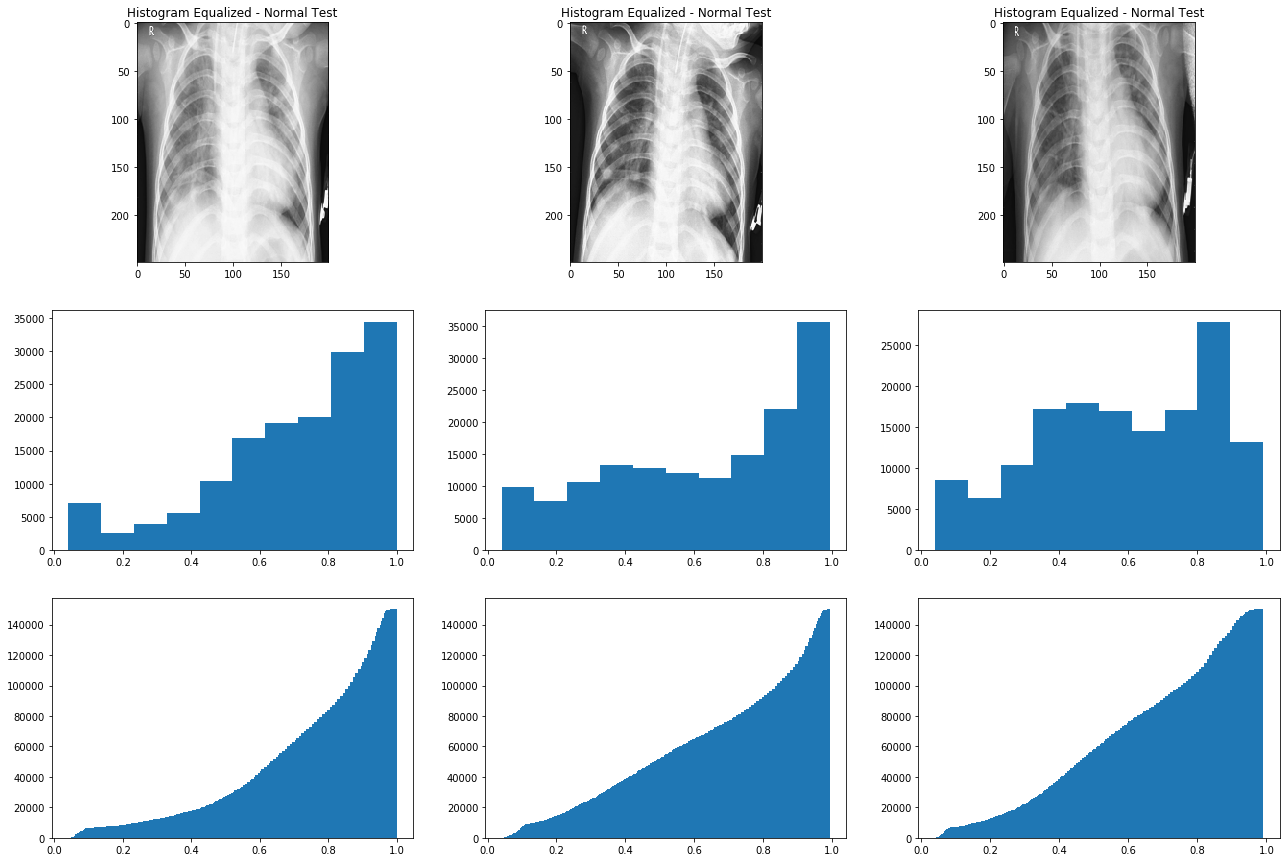

In [90]:
# Show the images
fig_p_tst = plt.figure(figsize=(22,15))

# Subplot for a few equalized xrays
p_tst = fig_p_tst.add_subplot(3,3,1)
imgplot = plt.imshow(Images_P_EH_Tst[0])
p_tst.set_title('Histogram Equalized - Normal Test')

p_tst = fig_p_tst.add_subplot(3,3,2)
imgplot = plt.imshow(Images_P_EH_Tst[1])
p_tst.set_title('Histogram Equalized - Normal Test')

p_tst = fig_p_tst.add_subplot(3,3,3)
imgplot = plt.imshow(Images_P_EH_Tst[3])
p_tst.set_title('Histogram Equalized - Normal Test')

# Subplots for equalized histograms of a few xrays
p_tst = fig_p_tst.add_subplot(3,3,4)
imgplot = plt.hist(Images_P_EH_Tst[0].ravel())

p_tst = fig_p_tst.add_subplot(3,3,5)
imgplot = plt.hist(Images_P_EH_Tst[1].ravel())

p_tst = fig_p_tst.add_subplot(3,3,6)
imgplot = plt.hist(Images_P_EH_Tst[3].ravel())

# Subplots for CDFs for a few xrays
p_tst = fig_p_tst.add_subplot(3,3,7)
imgplot = plt.hist(Images_P_EH_Tst[0].ravel(), bins=255, cumulative=True)

p_tst = fig_p_tst.add_subplot(3,3,8)
imgplot = plt.hist(Images_P_EH_Tst[1].ravel(), bins=255, cumulative=True)

p_tst = fig_p_tst.add_subplot(3,3,9)
imgplot = plt.hist(Images_P_EH_Tst[3].ravel(), bins=255, cumulative=True)

plt.show()


In [91]:
# Combining the Normal and Pneumonia images in the test set

total_Test = [*Images_N_EH_Tst, *Images_P_EH_Tst]
total_Labels_Test = [*Labels_N_Tst, *Labels_P_Tst]

In [92]:
print(len(total_Test))
total_Test = np.array(total_Test)
total_Labels_Test = np.array(total_Labels_Test)

624


In [93]:
print(total_Test.shape)
print(total_Labels_Test.shape)

(624, 250, 200, 3)
(624,)


In [94]:
def show_images(image, label):
    fig = plt.figure(figsize = (15,15))
    fig.suptitle('30 Images from the dataset' ,fontsize = 15)
    for i in range(30):
        index = np.random.randint(total_Train.shape[0])
        plt.subplot(6,5,i+1)
        plt.imshow(image[index])
        plt.xticks([]) #Scale doesn't appear
        plt.yticks([]) #Scale doesn't apper
        plt.title((label[index]))
        plt.grid(False)
    plt.show()

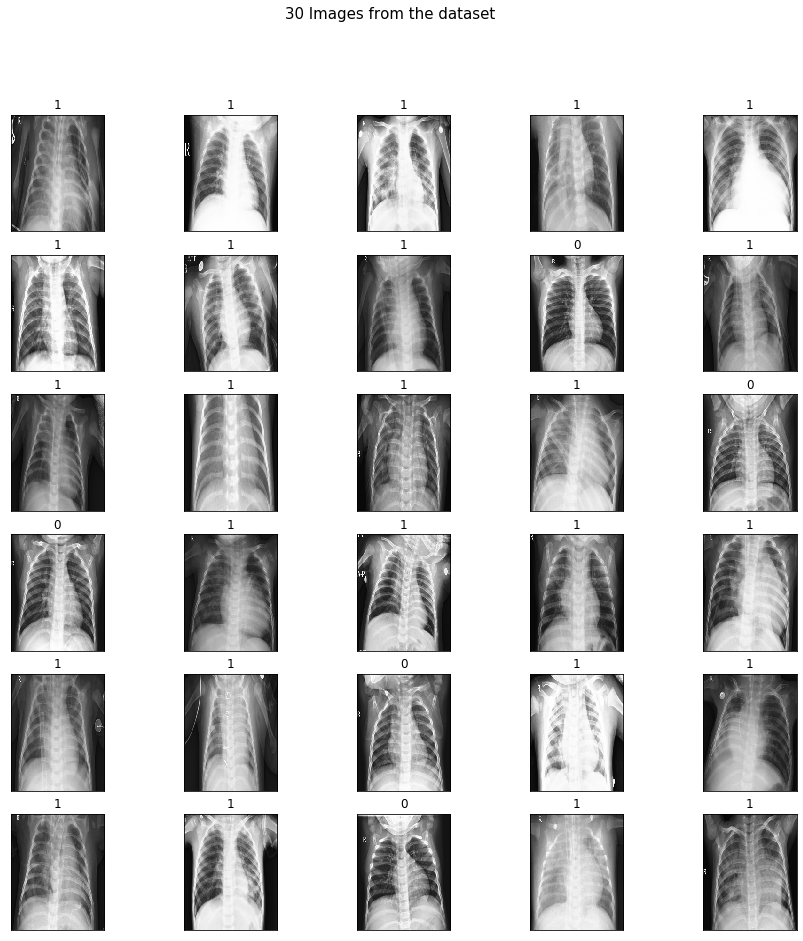

In [95]:
import matplotlib.pyplot as plt

show_images(total_Train, total_Labels)

In [96]:
#import keras
#from keras.utils import np_utils

#final_Labels = tf.keras.utils.to_categorical(total_Labels, 2)

In [97]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(total_Train, total_Labels, train_size = 1, shuffle = True)

In [98]:
# Build the model

import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.optimizers as Optimizers
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(250, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = Optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 99, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 97, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 21, 128)      

In [99]:
BATCH_SIZE = 16
EPOCHS = 10

In [100]:
#with tf.device('/GPU:0'):
history = model.fit(total_Train, total_Labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, callbacks=None, validation_split=0.2, shuffle=True)

Train on 4185 samples, validate on 1047 samples
Epoch 1/10
4185/4185 [==============================] - 99s 24ms/sample - loss: 0.2814 - accuracy: 0.8772 - val_loss: 0.2879 - val_accuracy: 0.8711
Epoch 2/10
4185/4185 [==============================] - 93s 22ms/sample - loss: 0.1234 - accuracy: 0.9513 - val_loss: 0.0855 - val_accuracy: 0.9628
Epoch 3/10
4185/4185 [==============================] - 96s 23ms/sample - loss: 0.0919 - accuracy: 0.9654 - val_loss: 0.1128 - val_accuracy: 0.9561
Epoch 4/10
4185/4185 [==============================] - 94s 23ms/sample - loss: 0.0766 - accuracy: 0.9735 - val_loss: 0.0742 - val_accuracy: 0.9704
Epoch 5/10
4185/4185 [==============================] - 95s 23ms/sample - loss: 0.0546 - accuracy: 0.9804 - val_loss: 0.0860 - val_accuracy: 0.9694
Epoch 6/10
4185/4185 [==============================] - 97s 23ms/sample - loss: 0.0386 - accuracy: 0.9869 - val_loss: 0.1027 - val_accuracy: 0.9608
Epoch 7/10
4185/4185 [==============================] - 97s 23ms

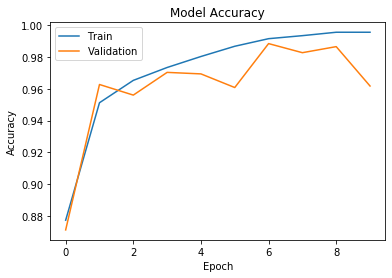

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

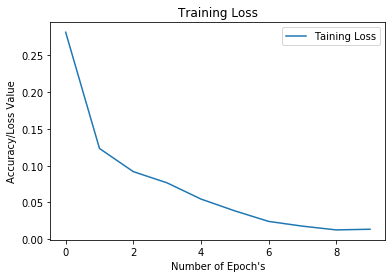

In [102]:
#plt.plot(range(10), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(10), history.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Loss')
plt.legend(loc = "best")
plt.show()

In [103]:
result = model.evaluate(test_x,test_y,verbose = 1)

5231/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [104]:
print("Test Accuracy: ", result[1] * 100, "%")

Test Accuracy:  98.92945885658264 %


In [105]:
model.save("C:/Users/andre/Desktop/pneumonia_normal_diagnosis.h5")

In [106]:
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('C:/Users/andre/Desktop/pneumonia_normal_diagnosis.h5')

# Chest x-ray of bacterial pneumonia (1) pulled off the internet
img = cv2.imread('C:/Users/andre/Desktop/bacterial_pneumonia.jpeg')

img = cv2.resize(img,(250,200))
img = np.reshape(img,[1,250,200,3])
img = tf.cast(img, tf.float32)

In [107]:
from keras.models import Model


Prediction = model.predict(img, batch_size = BATCH_SIZE, verbose = 1)

Using TensorFlow backend.


1/1 [==============================] - 1s 651ms/sample


In [108]:
print(Prediction)

[[1.]]
